In [6]:
from google.colab import files
uploaded = files.upload()

Saving database.sqlite to database.sqlite


Top 10 Highest Paid Employees:
('NATHANIEL FORD', 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 567595.43)
('David Shinn', 'Deputy Chief 3', 510732.68)
('Amy P Hart', 'Asst Med Examiner', 479652.21)
('William J Coaker Jr.', 'Chief Investment Officer', 436224.36)
('Gregory P Suhr', 'Chief of Police', 425815.28)
('Joanne M Hayes-White', 'Chief, Fire Department', 422353.4)
('Gregory P Suhr', 'Chief of Police', 418019.22)
('Joanne M Hayes-White', 'Chief, Fire Department', 417435.1)
('Ellen G Moffatt', 'Asst Med Examiner', 415767.94)
('Gary Altenberg', 'Lieutenant, Fire Suppression', 407274.78)

Years with missing data for 'Not Provided' or 'Not provided':

Number of unique agencies: 1

Average Pay for 2011:
AvgBasePay: 63593.40189363489
AvgOvertimePay: 4524.411276895831
AvgTotalPay: 71992.05006278132


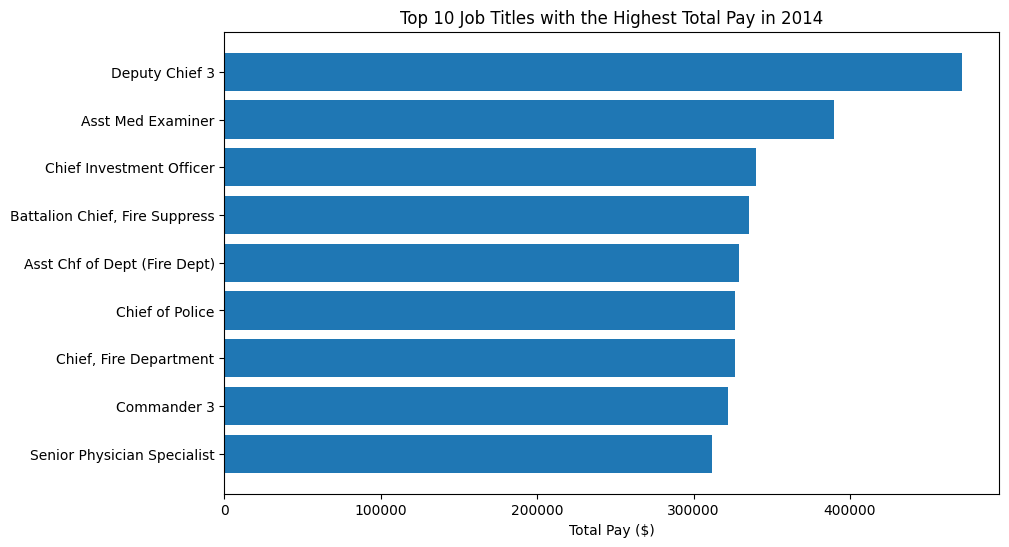

In [8]:

import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_path = 'database.sqlite'
conn = sqlite3.connect(db_path)

# Task 1: Top 10 highest paid employees by TotalPayBenefits
query_top_10 = """
SELECT EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
ORDER BY TotalPayBenefits DESC
LIMIT 10;
"""
top_10_highest_paid = conn.execute(query_top_10).fetchall()
print("Top 10 Highest Paid Employees:")
for row in top_10_highest_paid:
    print(row)

# Task 2: Find which year has missing data for employees with "Not Provided" or "Not provided"
query_missing_data = """
SELECT Year, COUNT(*) AS MissingCount
FROM Salaries
WHERE Status IN ('Not Provided', 'Not provided')
GROUP BY Year;
"""
missing_data_years = conn.execute(query_missing_data).fetchall()
print("\nYears with missing data for 'Not Provided' or 'Not provided':")
for row in missing_data_years:
    print(row)

# Task 3: Number of unique agencies
query_unique_agencies = """
SELECT COUNT(DISTINCT Agency) AS UniqueAgencies
FROM Salaries;
"""
unique_agencies_count = conn.execute(query_unique_agencies).fetchone()
print(f"\nNumber of unique agencies: {unique_agencies_count[0]}")

# Task 4: Average BasePay, OvertimePay, and TotalPay for the year 2011
query_avg_pay_2011 = """
SELECT
    AVG(BasePay) AS AvgBasePay,
    AVG(OvertimePay) AS AvgOvertimePay,
    AVG(TotalPay) AS AvgTotalPay
FROM Salaries
WHERE Year = 2011;
"""
avg_pay_2011 = conn.execute(query_avg_pay_2011).fetchone()
print("\nAverage Pay for 2011:")
print(f"AvgBasePay: {avg_pay_2011[0]}")
print(f"AvgOvertimePay: {avg_pay_2011[1]}")
print(f"AvgTotalPay: {avg_pay_2011[2]}")

# Task 5: Plot the top 10 job titles with the highest TotalPay in 2014
query_top_10_job_titles_2014 = """
SELECT JobTitle, TotalPay
FROM Salaries
WHERE Year = 2014
ORDER BY TotalPay DESC
LIMIT 10;
"""
top_10_job_titles_2014 = conn.execute(query_top_10_job_titles_2014).fetchall()

# Extract job titles and total pay for plotting
job_titles = [entry[0] for entry in top_10_job_titles_2014]
total_pay = [entry[1] for entry in top_10_job_titles_2014]

# Plotting the top 10 job titles with the highest total pay
plt.figure(figsize=(10, 6))
plt.barh(job_titles, total_pay)
plt.xlabel('Total Pay ($)')
plt.title('Top 10 Job Titles with the Highest Total Pay in 2014')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest pay at the top
plt.show()

# Close the database connection
conn.close()
